# **<center><mark> Basic Distributions and Statistical Tests </mark> </center>**

rvs: Random Variates

pdf: Probability Density Function

cdf: Cumulative Distribution Function

sf: Survival Function (1-CDF)

ppf: Percent Point Function (Inverse of CDF)

isf: Inverse Survival Function (Inverse of SF)

stats: Return mean, variance, (Fisher’s) skew, or (Fisher’s) kurtosis

moment: non-central moments of the distribution

In [2]:
%matplotlib inline
# necessary 
import pandas as pd
import numpy as np

# graphing models
import matplotlib.pyplot as plt
import seaborn as sns

# statistical models
from scipy import stats 
import statsmodels.api as sm

# time measurement
import time

start = time.time()

<hr style="height:10px;border:none;background-color:rgb(255, 255, 0);">

In [3]:
start = time.time()

### Continuous Uniform distribution

\begin{equation*}
  Mean = \frac{a+b}{2}
\end{equation*}

\begin{equation*}
  Mode = any\ value\ from\ (a,b)
\end{equation*}

\begin{equation*}
  Median = \frac{a+b}{2}
\end{equation*}

\begin{equation*}
  Variance = \frac{b-a}{4}
\end{equation*}

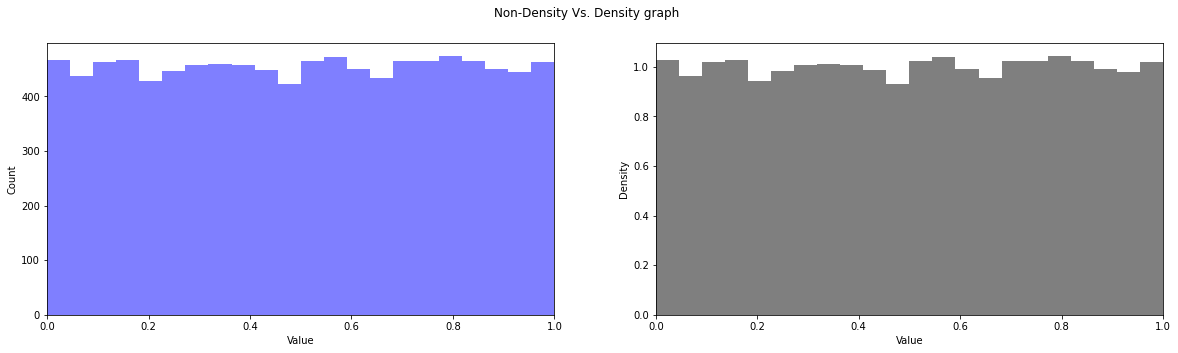

Mean is: 0.5
Variance is: 0.08333333333333333
Skewness is: 0.0
Kurtosis is: -1.2


In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,5))
fig.suptitle('Non-Density Vs. Density graph')

# Setting distribution (uniform on [0, 1]) and sample size
distribution = stats.uniform(loc=0, scale=1)
sample =  distribution.rvs(size=10000)

# To get the first four moments of the distribution
mean, var, skew, kurt = distribution.stats(moments = 'mvsk')

# Density = True means that the area under the graph integrates to 1. alpha is opacity of graph
ax1.set_xlim(0,1); ax1.set_xlabel('Value'); ax1.set_ylabel('Count')
ax1.hist(sample,density = False, bins = 'auto', color = 'b', histtype = 'stepfilled', alpha = 0.5)

# # Density = True means that the area under the graph integrates to 1. alpha is opacity of graph
ax2.set_xlim(0,1); ax2.set_xlabel('Value'); ax2.set_ylabel('Density')
ax2.hist(sample,density = True, bins = 'auto', color = 'k', histtype = 'stepfilled', alpha = 0.5)

# Show plots
plt.show()


print('Mean is:',mean); print('Variance is:',var); 
print('Skewness is:',skew); print('Kurtosis is:',kurt)

<hr style="height:10px;border:none;background-color:rgb(255, 255, 0);">

### Normal Distribution

\begin{equation*}
  Mean =\mu
\end{equation*}

\begin{equation*}
  Mode =\mu
\end{equation*}

\begin{equation*}
  Median =\mu
\end{equation*}

\begin{equation*}
  Variance =\sigma^2
\end{equation*}

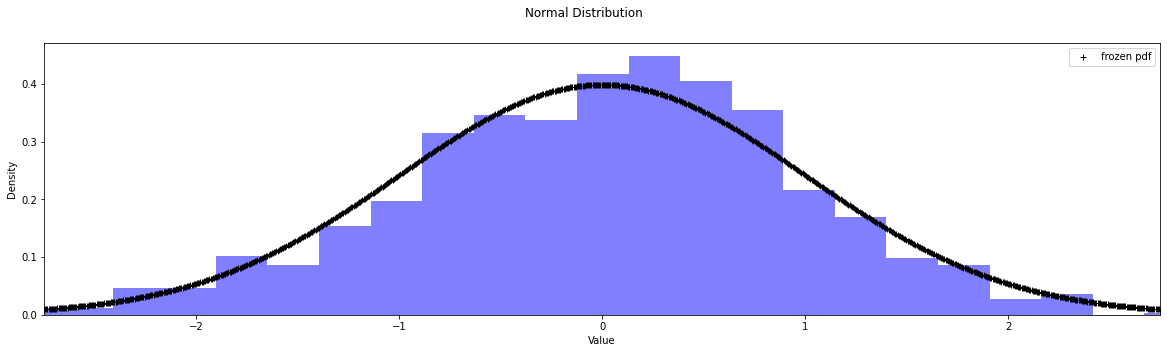

Mean is: 0.0
Variance is: 1.0
Skewness is: 0.0
Kurtosis is: 0.0


In [5]:
fig, ax = plt.subplots(1, 1, figsize = (20,5))
fig.suptitle('Normal Distribution')

# norm.pdf(x, loc, scale) = norm.pdf(y) / scale, with y = (x - loc) / scale.
# loc specifies the mean and scale specifies the standard deviation
distribution = stats.norm(loc=0, scale=1)
sample =  distribution.rvs(size=1000)

# pdf values to correspond with the xlim values
# The 68-95-99.7 rule, where nearly all values lie within 3 standard deviations of the mean.
# This should be sufficient to show our graph
normal_curve = np.linspace(stats.norm.ppf(0.003),
                stats.norm.ppf(0.997), 1000)

# To get the first four moments of the distribution
mean, var, skew, kurt = distribution.stats(moments = 'mvsk')

# Set the shape and parameters of the example normal curve
ax.plot(normal_curve, stats.norm.pdf(normal_curve),'k+', lw=5, label='frozen pdf')

# Density = True means that the area under the graph integrates to 1. alpha is opacity of graph
ax.set_xlim(normal_curve[0],normal_curve[-1]); ax.set_xlabel('Value'); ax.set_ylabel('Density')
ax.hist(sample,density = True, bins = 'auto', color = 'b', histtype = 'stepfilled', alpha = 0.5)
ax.legend()

# Show plots
plt.show()

print('Mean is:',mean); print('Variance is:',var); 
print('Skewness is:',skew); print('Kurtosis is:',kurt)

Shapiro-Wilk test

In [6]:
# to test if the distribution is normal, if p < 0.05 then the null hypothesis that the distribution is normal is rejected
shapiro_test = stats.shapiro(sample)

if shapiro_test.pvalue < 0.05:
    print('pvalue is:',shapiro_test.pvalue, '< 0.05 .Thus, the the null hypothesis that the distribution is normal IS rejected')
else:
    print('pvalue is:',shapiro_test.pvalue, '> 0.05 .Thus, the the null hypothesis that the distribution is normal IS NOT rejected')


pvalue is: 0.04525607451796532 < 0.05 .Thus, the the null hypothesis that the distribution is normal IS rejected


<hr style="height:10px;border:none;background-color:rgb(255, 255, 0);">

### Binomial Distribution

\begin{equation*}
  Mean = np
\end{equation*}

\begin{equation*}
  Mode = \lfloor(n+1)p\rfloor \ or \ \lceil(n+1)p\rceil -1
\end{equation*}

\begin{equation*}
  Median = \lfloor np \rfloor \ or \ \lceil np \rceil
\end{equation*}

\begin{equation*}
  Variance = npq
\end{equation*}

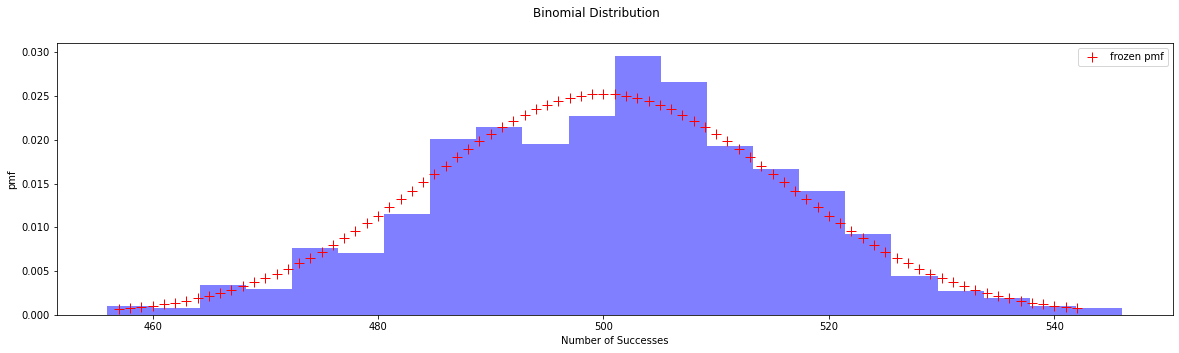

Mean is: 500.0
Variance is: 250.0
Skewness is: 0.0
Kurtosis is: -0.002


In [7]:
fig, ax = plt.subplots(1, 1, figsize = (20,5))
fig.suptitle('Binomial Distribution')

# binom.pmf(k, n, p, loc) = binom.pmf(k - loc, n, p)
# n is the size and p is the probability
n = 1000; p=0.5
Binomial_curve = np.arange(stats.binom.ppf(0.003, n, p),
                           stats.binom.ppf(0.997, n, p))

# setting binomial sample
distribution = stats.binom(n,p)
sample =  distribution.rvs(size=1000)

# To get the first four moments of the distribution
mean, var, skew, kurt = distribution.stats(moments = 'mvsk')

# Set the shape and parameters of the example binomial curve
ax.plot(Binomial_curve, stats.binom.pmf(Binomial_curve, n, p), 'r+', ms = 10, label='frozen pmf')

# Density = True means that the area under the graph integrates to 1. alpha is opacity of graph
ax.set_xlabel('Number of Successes'); ax.set_ylabel('pmf')
ax.hist(sample,density = True, bins = 'auto', color = 'b', histtype = 'stepfilled', alpha = 0.5)
ax.legend()

# Show plots
plt.show()

print('Mean is:',mean); print('Variance is:',var); 
print('Skewness is:',skew); print('Kurtosis is:',kurt)

Binomial test

In [8]:
# k is number of successes, n is number of trials, p is probability of success of trial

# Calculate Binomial probability of 500 successes where the probability of success is 50% with 1000 trials 
print(stats.binom.pmf(k=500, n=1000, p=0.5))

# Simple Binomial hypothesis testing with the claim that NO MORE than 50% of trials will succeed.
# The probability of success is 50% with 1000 trials and 500 successes recorded.
binom_test = stats.binomtest(k=500, n=1000, p=0.5, alternative='greater')

if binom_test.pvalue < 0.05:
    print('pvalue is:',binom_test.pvalue, '< 0.05 .Thus, the the null hypothesis that no more than 50% of trials will succeed IS rejected')
else:
    print('pvalue is:',binom_test.pvalue, '> 0.05 .Thus, the the null hypothesis that no more than 50% of trials will succeed is NOT rejected')

0.025225018178360824
pvalue is: 0.51261250908918 > 0.05 .Thus, the the null hypothesis that no more than 50% of trials will succeed is NOT rejected


<hr style="height:10px;border:none;background-color:rgb(255, 255, 0);">

### Exponential Distribution

\begin{equation*}
  Mean = \frac{1}{\lambda}
\end{equation*}

\begin{equation*}
  Mode = 0
\end{equation*}

\begin{equation*}
  Median = \frac{\ln2}{\lambda}
\end{equation*}

\begin{equation*}
  Variance = \frac{1}{\lambda^2}
\end{equation*}

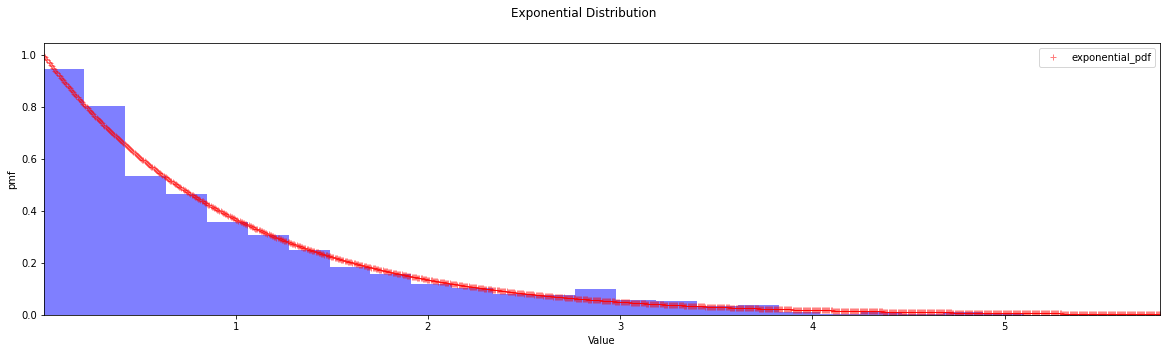

Mean is: 1.0
Variance is: 1.0
Skewness is: 2.0
Kurtosis is: 6.0


In [9]:
fig, ax = plt.subplots(1, 1, figsize = (20,5))
fig.suptitle('Exponential Distribution')

# setting sample
distribution = stats.expon()
sample =  distribution.rvs(size=1000)

# expon.pdf(x, loc, scale) = expon.pdf(y) / scale, with y = (x - loc) / scale
# The samples for example exponential curve
Exponential_curve = np.linspace(stats.expon.ppf(0.003),
                                stats.expon.ppf(0.997),1000)

# To get the first four moments of the distribution
mean, var, skew, kurt = stats.expon.stats(moments ='mvsk')

# Set the shape and parameters of the example Exponential curve
ax.plot(Exponential_curve, stats.expon.pdf(Exponential_curve),
       'r+', lw=5, alpha=0.5, label='exponential_pdf')

#  Output the exponential graph
ax.set_xlabel('Value'); ax.set_ylabel('pmf')
ax.set_xlim(Exponential_curve[0],Exponential_curve[-1])
ax.hist(sample,density = True, bins = 'auto', color = 'b', histtype = 'stepfilled', alpha = 0.5)
ax.legend()

# Show plots
plt.show()

print('Mean is:',mean); print('Variance is:',var); 
print('Skewness is:',skew); print('Kurtosis is:',kurt)

Exponential Distribution Test

<blockquote>Could use the ks tests or the goodness of fit test to compare the sample distribution with the generated Exponential Distribution. <br> Can be found in the 'Other Statistical tests section' at the bottom. </blockquote>

<hr style="height:10px;border:none;background-color:rgb(255, 255, 0);">

### Poisson Distribution

\begin{equation*}
  Mean = \lambda
\end{equation*}

\begin{equation*}
  Mode = \lceil\lambda\rceil - 1,\lambda
\end{equation*}

\begin{equation*}
  Median \approx \lfloor \lambda + \frac{1}{3} - \frac{1}{50\lambda} \rfloor
\end{equation*}

\begin{equation*}
  Variance = \lambda
\end{equation*}

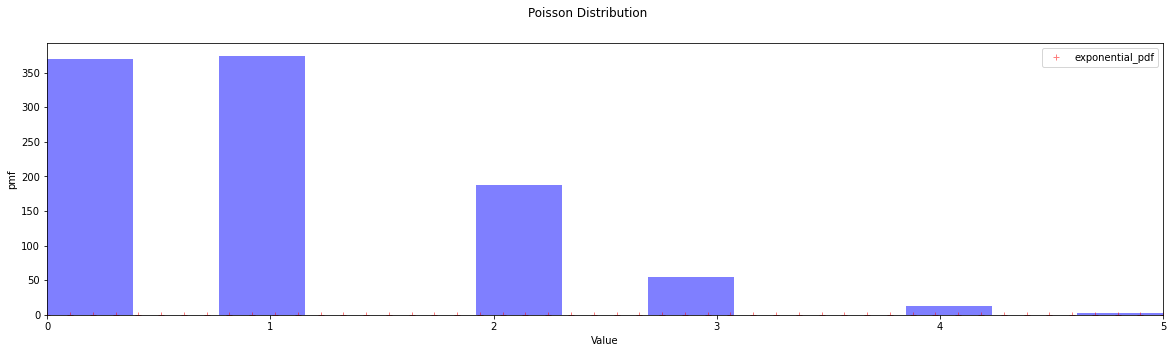

Mean is: 1.0
Variance is: 1.0
Skewness is: 2.0
Kurtosis is: 6.0


In [10]:
fig, ax = plt.subplots(1, 1, figsize = (20,5))
fig.suptitle('Poisson Distribution')

# setting sample
distribution = stats.poisson(mu=1)
sample =  distribution.rvs(size=1000)

# The samples for example poisson curve
mu = 1
Poisson_curve = np.linspace(stats.poisson.ppf(0.003,mu),
                            stats.poisson.ppf(0.997,mu))

# To get the first four moments of the distribution
mean, var, skew, kurt = stats.expon.stats(moments ='mvsk')

# Set the shape and parameters of the example Exponential curve
ax.plot(Poisson_curve, stats.poisson.pmf(Poisson_curve,1), 
        'r+', lw=5, alpha=0.5, label='exponential_pdf')

#  Output the exponential graph
ax.set_xlabel('Value'); ax.set_ylabel('pmf')
ax.set_xlim(Poisson_curve[0],Poisson_curve[-1])
ax.hist(sample, bins = 'auto', color = 'b', histtype = 'stepfilled', alpha = 0.5)
ax.legend()

# Show plots
plt.show()

print('Mean is:',mean); print('Variance is:',var); 
print('Skewness is:',skew); print('Kurtosis is:',kurt)

Poisson Exact Test

In [11]:
# Assuming the two distributions are verified to be Poisson Distributions
# This is to reject or not reject the Null hypothesis that the difference between means of two Poisson distributions is not significant
# The test is useful even if the sample sizes are different
control_count = 5
control_sample = 100 
test_count = 20
test_sample = 200
poisson_test = stats.poisson_means_test(control_count, control_sample, test_count, test_sample)

if poisson_test.pvalue < 0.05:
    print('pvalue is:',poisson_test.pvalue, '< 0.05 .Thus, the null hypothesis, the difference between means of two Poisson distributions is not significant IS rejected.')
else:
    print('pvalue is:',poisson_test.pvalue, '> 0.05 .Thus, the null hypothesis, the difference between means of two Poisson distributions is not significant IS NOT rejected.')

pvalue is: 0.11908457897693743 > 0.05 .Thus, the null hypothesis, the difference between means of two Poisson distributions is not significant IS NOT rejected.


Applications of Poisson in Finance

In [12]:
# mu is mean for specific time interval, k is number of occurences for specific time interval

# 1. Find probability that the customers come to the store per day given i.i.d
# Mean customers per day is 50 and we want to find the probability that 60 customers appear
print('Probability of 60 customers in a day is:',stats.poisson.pmf(mu = 50,k = 60))

# 2. Example would be modeling stock price jumps during a normal market condition
# Suppose price jumps has known constant mean (mu = 10) and are i.i.d in time interval of 1 day
# We want to find the probability that number of price jumps is less than or equal to 7
print('Probability of 7 or less price jumps in a day is:',stats.poisson.cdf(mu = 10, k = 7))

# 3. Suppose we are checking Order arrivals and cancellations 
# They are assumed to be Poisson random processes https://arxiv.org/abs/cond-mat/0112422
Order_count = 5
Order_sample = 100 
Cancellation_count = 20
Cancellation_sample = 200
poisson_test = stats.poisson_means_test(Order_count, Order_sample, Cancellation_count, Cancellation_sample)

if poisson_test.pvalue < 0.05:
    print('pvalue is:',poisson_test.pvalue, '< 0.05 .Thus, the null hypothesis, the difference between means of Order and Cancellation is not significant IS rejected.')
else:
    print('pvalue is:',poisson_test.pvalue, '> 0.05 .Thus, the null hypothesis, the difference between means of Order and Cancellation is not significant IS NOT rejected.')

# http://faculty.baruch.cuny.edu/jgatheral/JumpDiffusionModels.pdf


Probability of 60 customers in a day is: 0.020104872145675377
Probability of 7 or less price jumps in a day is: 0.220220646601699
pvalue is: 0.11908457897693743 > 0.05 .Thus, the null hypothesis, the difference between means of Order and Cancellation is not significant IS NOT rejected.


<hr style="height:10px;border:none;background-color:rgb(255, 255, 0);">

### Lognormal Distribution

\begin{equation*}
  Mean =\exp ( \mu +
  \frac{\sigma^2}
  {2})
\end{equation*}

\begin{equation*}
  Mode =\exp (\mu -
  \sigma^2)  
\end{equation*}

\begin{equation*}
  Median =\exp (\mu) 
\end{equation*}

\begin{equation*}
  Variance = [\exp (\sigma^2 - 1)](\exp (2\mu + \sigma^2))
\end{equation*}

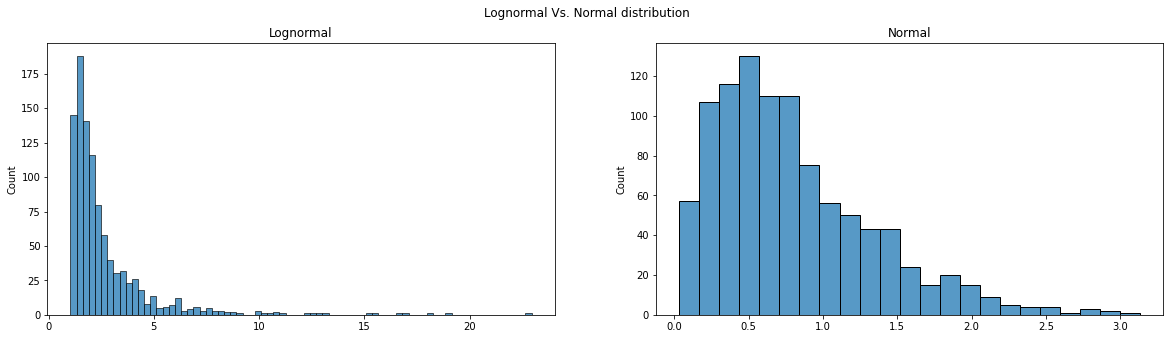

Mean is: 1.6487212707001282
Variance is: 4.670774270471604
Skewness is: 6.184877138632554
Kurtosis is: 110.9363921763115
Since skewness is 6.184877138632554 > 0 which is positively high, the normal distribution derived from taking the log function of the samples is right-skewed


In [13]:
fig, axes = plt.subplots(1,2, figsize = (20,5))
fig.suptitle("Lognormal Vs. Normal distribution")

# mean and standard deviation
mu, sigma = 1, 1
distribution = stats.lognorm(mu,sigma)
sample =  distribution.rvs(size=1000)

mean, var, skew, kurt = stats.lognorm.stats(s = 1, moments ='mvsk')

# create histogramplot in each subplot, subplots dont allow distribution plots but they are similar in nature 
axes[0].set_title('Lognormal') ; axes[1].set_title('Normal') 
sns.histplot(data = sample,ax=axes[0]);
sns.histplot(data = np.log(sample),ax=axes[1]);
plt.show()

print('Mean is:',mean); print('Variance is:',var); 
print('Skewness is:',skew); print('Kurtosis is:',kurt)
print('Since skewness is 6.184877138632554 > 0 which is positively high, the normal distribution derived from taking the log function of the samples is right-skewed')

Lognormal Distribution Test

<blockquote>Could use the ks tests or the goodness of fit test to compare the sample distribution with the generated Lognormal Distribution. <br> Can be found in the 'Other Statistical tests section' at the bottom. <br>
Another could be QQplot. </blockquote>

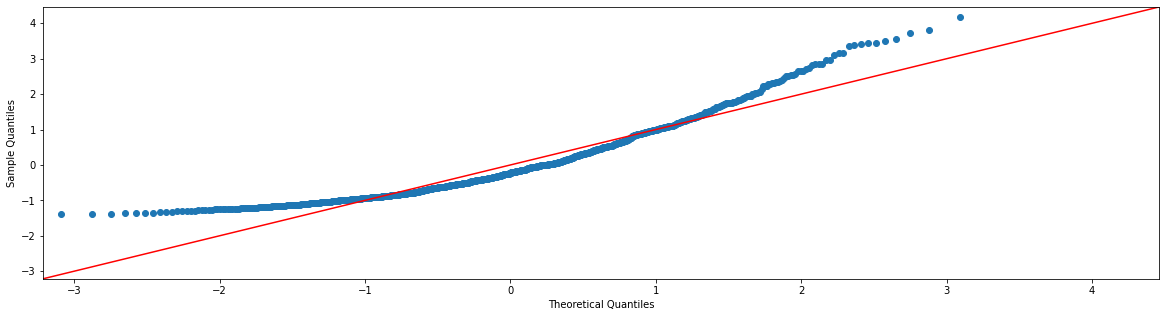

In [22]:
mu = 1; sigma = 1
distribution = stats.lognorm(mu,sigma)
sample =  distribution.rvs(size=1000)

fig, axes = plt.subplots(1,1, figsize = (20,5))
fig = sm.qqplot(np.log(sample), fit=True, line="45",ax = axes)
plt.show()

<hr style="height:10px;border:none;background-color:rgb(255, 255, 0);">

### Power Law Distribution (Pareto)

$$Mean=\
\left\{ 
  \begin{aligned}
  \infty \ ,\quad for \ \alpha \leq 1 \\
  \frac{\alpha x_{m}}{\alpha - 1} \ , \quad for \ \alpha > 1 \\
  \end{aligned}
\right.
$$

\begin{equation*}
  Mode = x_{m}
\end{equation*}

\begin{equation*}
  Median = x_{m} \sqrt[\alpha] 2
\end{equation*}

$$Variance=\
\left\{ 
  \begin{aligned}
  \infty \ ,\quad for \ \alpha \leq 2\\
  \frac{\alpha x_{m}^2}{(\alpha - 1)^2(\alpha - 2)} \ , \quad for \ \alpha > 2\\
  \end{aligned}
\right.
$$


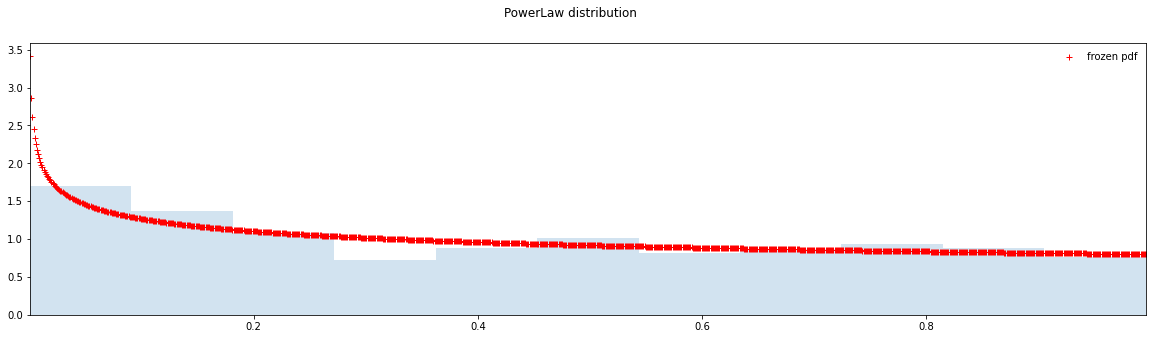

In [29]:
fig, ax = plt.subplots(1, 1, figsize = (20,5))
fig.suptitle("PowerLaw distribution")

# powerlaw.pdf(x, a, loc, scale) = powerlaw.pdf(y, a) / scale, with  y = (x - loc) / scale.
a = 0.8
mean, var, skew, kurt = stats.powerlaw.stats(a, moments='mvsk')

# The samples for example poisson curve
mu = 1
powerlaw_curve = np.linspace(stats.powerlaw.ppf(0.003,a),
                            stats.powerlaw.ppf(0.997,a),1000)

ax.plot(powerlaw_curve, stats.powerlaw.pdf(powerlaw_curve,a), 'r+', lw=5, label='frozen pdf')

# setting sample
distribution = stats.powerlaw(a)
sample =  distribution.rvs(size=1000)

ax.hist(sample, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([powerlaw_curve[0], powerlaw_curve[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

Powerlaw Distribution Test

<blockquote>Could use the ks tests or the goodness of fit test to compare the sample distribution with the generated Lognormal Distribution. <br> Can be found in the 'Other Statistical tests section' at the bottom. </blockquote>

<hr style="height:10px;border:none;background-color:rgb(255, 255, 0);">

### Law of Large Numbers

<blockquote> We can observe the law of large numbers from any probability distributions. <br> General rule of thumb is sample size > 30. As the sample size increases, the sample mean approaches the expected mean of the distribution. </blockquote>

In [16]:
# show for the various distributions.
def large_numbers(mu,size):
    distribution = stats.poisson(mu=mu)
    sample =  distribution.rvs(size=size)
    mean, var, skew, kurt = stats.expon.stats(moments ='mvsk')
    print('Sample mean is:',str.format('{0:.15f}', sum(sample)/size))
    print('Expected mean is:',mean)

large_numbers(100,1000)

Sample mean is: 100.450999999999993
Expected mean is: 1.0


<hr style="height:10px;border:none;background-color:rgb(255, 255, 0);">

### Other Statistical Tests

Kolmogorov-Smirnov 1-sample test

In [17]:
# used to compare a sample with a known distribution
# To reject or not reject the Null hypothesis that the sample has the same distribution as the known distribution

# we will use random variables from a lognormal and compare with a Normal distribution
mu = 1; sigma = 1
distribution = stats.lognorm(mu, sigma)
sample = distribution.rvs(size=1000)
known_distribution = stats.norm(1,1).cdf

ksample = stats.ks_1samp(sample, known_distribution)

if ksample.pvalue < 0.05:
    print('pvalue is:',ksample.pvalue, '< 0.05 .Thus, the null hypothesis, the sample has the same distribution as the known distribution IS rejected.')
else:
    print('pvalue is:',ksample.pvalue, '> 0.05 .Thus, the null hypothesis, the sample has the same distribution as the known distribution IS NOT rejected.')


pvalue is: 1.4106325662317895e-265 < 0.05 .Thus, the null hypothesis, the sample has the same distribution as the known distribution IS rejected.


Kolmogorov-Smirnov 2-sample test

In [18]:
# used to compare two samples
# To reject or not reject the Null hypothesis that the two samples have the same distribution

# we will use random variables from a lognormal and uniform distribution respectively.
distribution = stats.lognorm(mu, sigma)
sample = distribution.rvs(size=1000)

distribution2 = stats.uniform()
sample2 = distribution2.rvs(size=1000)

k2sample = stats.ks_2samp(sample,sample2)

if k2sample.pvalue < 0.05:
    print('pvalue is:',k2sample.pvalue, '< 0.05 .Thus, the Null hypothesis, the two samples have the same distribution IS rejected.')
else:
    print('pvalue is:',k2sample.pvalue, '> 0.05 .Thus, the null hypothesis, the two samples have the same distribution IS NOT rejected.')


pvalue is: 0.0 < 0.05 .Thus, the Null hypothesis, the two samples have the same distribution IS rejected.


Goodness of Fit test

pvalue is: 0.0001 < 0.05 .Thus, the null hypothesis, the data were drawn from a distribution in that family IS rejected.


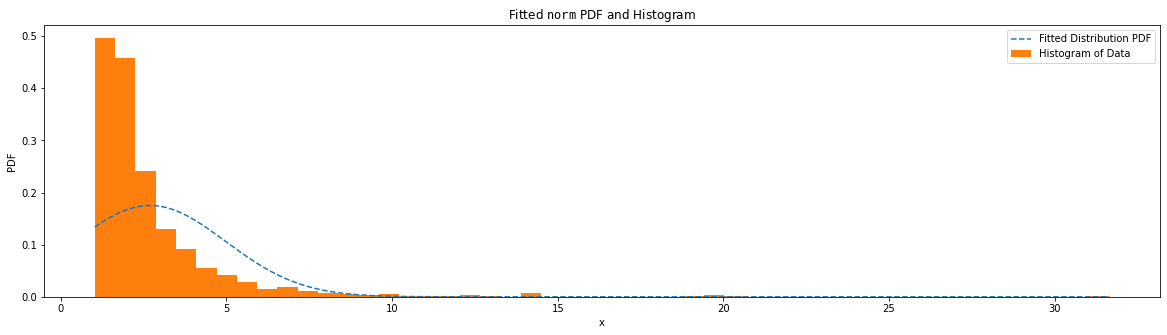

In [33]:
# Performs a test null hypothesis that the data were drawn from a distribution in that family.  

# Using Goodness of Fit tests for lognormal variables and normal distribution
mu = 1; sigma = 1
distribution = stats.lognorm(mu, sigma)
sample = distribution.rvs(size=1000)

# The statistic stands for 'ks': Kolmogoro-smirnov, 'ad': Anderson-Darling, 'cvm': Cramer-von-Mises
fit_test = stats.goodness_of_fit(stats.norm, sample, statistic = 'ks')

# plots the data and fitted distribution pdf
fig, ax = plt.subplots(figsize=(20, 5))
figure = fit_test.fit_result.plot(ax=ax)

if fit_test.pvalue < 0.05:
    print('pvalue is:',fit_test.pvalue, '< 0.05 .Thus, the null hypothesis, the data were drawn from a distribution in that family IS rejected.')
else:
    print('pvalue is:',fit_test.pvalue, '> 0.05 .Thus, the null hypothesis, the data were drawn from a distribution in that family IS NOT rejected.')

F-Test

pvalue is: 1.4340432844348772e-102 < 0.05 .Thus, the null hypothesis, the two normal distributions have the same mean IS rejected.


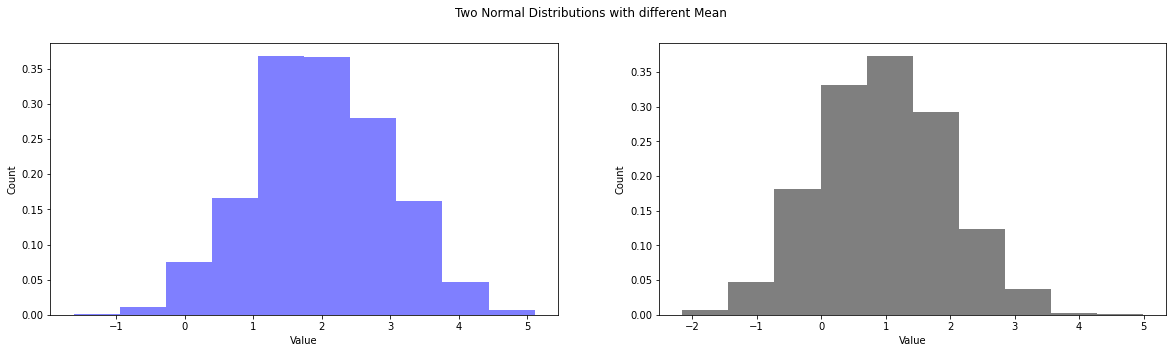

In [20]:
# F-test is only applicable for normal distributions with equal standard deviations.
# To reject or Not reject the Null hypothesis that the two normal distributions have the same mean
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,5))
fig.suptitle('Two Normal Distributions with different Mean')

# Creating the two normal distributions with different means
distribution = stats.norm(loc=2, scale=1)
sample =  distribution.rvs(size=1000)

distribution2 = stats.norm(loc=1, scale=1)
sample2 =  distribution2.rvs(size=1000)

# Density = True means that the area under the graph integrates to 1. alpha is opacity of graph
ax1.set_xlabel('Value'); ax1.set_ylabel('Count')
ax1.hist(sample, density = True, color = 'b', alpha = 0.5)

# # Density = True means that the area under the graph integrates to 1. alpha is opacity of graph
ax2.set_xlabel('Value'); ax2.set_ylabel('Count')
ax2.hist(sample2, density = True, color = 'k', alpha = 0.5)

# performing F-test
f_test = stats.f_oneway(sample,sample2)

if f_test.pvalue < 0.05:
    print('pvalue is:',f_test.pvalue, '< 0.05 .Thus, the null hypothesis, the two normal distributions have the same mean IS rejected.')
else:
    print('pvalue is:',f_test.pvalue, '> 0.05 .Thus, the null hypothesis, the two normal distributions have the same mean IS NOT rejected.')

<hr style="height:10px;border:none;background-color:rgb(255, 255, 0);">

### Limitations of Statistical Tests

As with all statistical tests, there are limitations that come with them. <br>
For example ,the Kolmogorov-smirnov(KS) test measures the maximum distance between the empirical Cumulative distribution function (ECDF) and the comparison step function of the second dataset. <br>
But, the KS statistic is only sensitive towards the differences in the medians and insensitive when the differences between the curves is most prominent near the beginning or end of the distributions (the tails). <br> The Anderson-Darling test is a weighted test that would be more suited when using the goodness of fit test.

Another example would be tests that bin data. <br>
A chi-squared test is used to compare binned data (e.g. a histogram) with another set of binned data. <br>
A ks test is applied to unbinned data to compare the cumulative frequency of two distributions. <br>
By binning the data, we are discretising the data and thereby also losing some data with it. It is not recommended for continuous variables. <br> Therefore, there must be a good reasons as significant distinctions between each bin, or cut-offs that pertain to different categories (credit scores perhaps)

In [21]:
# Track program execution 
print(f'Time: {time.time() - start}')

Time: 6.956146717071533


<hr style="height:10px;border:none;background-color:rgb(255, 255, 0);">

### Appendix

| Index | Documentation  |
|--------------|------|
|   Pandas     | https://pandas.pydata.org/pandas-docs/stable/reference/|
|   Numpy      | https://numpy.org/doc/1.24/reference/index.html|
|   Scipy      | https://docs.scipy.org/doc/scipy/reference/stats.html|
|   Statsmodels| https://www.statsmodels.org/stable/api.html|
|   Plotly     | https://plotly.com/python/time-series/ |
|   Latex      | https://www.overleaf.com/learn/latex/Subscripts_and_superscripts |


Some ideas from using the tests:
-  distribution of stock prices and returns
-  distribution of option prices
-  show that they are conditional moments suitable for prices and returns

References:
<nav>
<a href=https://stats.stackexchange.com/questions/403237/kolmogorov-smirnov-test-vs-anderson-darling-test>Limitations of KS test</a> |
<a href=https://physics.stackexchange.com/questions/107682/kolmogorov-smirnov-test-vs-chi-squared-test>Comparison of KS and chi-squared test</a> |
<a href=https://discourse.datamethods.org/t/categorizing-continuous-variables/3402>Problems of categorising Continuous Variables</a> | 
<a href=https://userweb.ucs.louisiana.edu/~kxk4695/JSPI-04.pdf>Poisson Test</a> <br>
<a href=https://www.statology.org/central-limit-theorem>Central Limit Theorem</a> |
<a href=https://python-bloggers.com/2020/11/law-of-large-numbers-and-the-central-limit-theorem-with-python>Law of Large Numbers</a> |
</nav> 